In [1]:
import tensorflow as tf
import numpy as np
!pip install pandas
import pandas as pd
from matplotlib.pyplot import imshow, legend, show
!pip install -q pyyaml h5py
try:
    from keras_lr_finder import LRFinder
    from tqdm import tqdm
except Exception as error:
    !pip install {str(error)[17:-1]}
    from keras_lr_finder import LRFinder
except:
    print("Pacote não encontrado")
    

print(tf.version.VERSION)

tf.compat.v1.disable_v2_behavior()

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
2.4.1


In [2]:
lesions = {0: "Basal Cell Carcinoma", 
    1: "Lentigo",
    2: "Malignant Melanoma", 
    3: "Melanocytic naevus",
    4: "seborrhoeic keratosis",
    5: "Wart", 
    6: "Actinic Keratosis",
    7: "Squamous Cell Carcinoma",
    8: "Intraepithelial Carcinoma", 
    9: "Pyogenic Granuloma",
    10: "Haemangioma",
    11: "Dermatofibroma"
}

In [3]:
# train = pd.read_csv('train.csv',index_col=0)
# test = pd.read_csv('test.csv',index_col=0)
# val = pd.read_csv('val.csv',index_col=0)

# train_y = train['label'].values
# test_y = test['label'].values
# val_y = val['label'].values

# train.head()

,id,label
0,dataset-split/train/Wart/Wart_original_100.jpg...,5
1,dataset-split/train/Wart/Wart_original_37.jpg_...,5
2,dataset-split/train/Wart/Wart_original_2.jpg_4...,5
3,dataset-split/train/Wart/Wart_original_21.jpg_...,5
4,dataset-split/train/Wart/Wart_original_54.jpg_...,5


In [4]:
# df_train = pd.DataFrame(train)
# df_test = pd.DataFrame(test)
# df_val = pd.DataFrame(val)

In [5]:
# # step 1
# train_dataset_filenames = df_train['id'].values.tolist()
# train_dataset_labels = df_train['label'].values.tolist()
# filenames = tf.constant(train_dataset_filenames)
# labels = tf.constant(train_dataset_labels)

# # step 2: create a dataset returning slices of `filenames`
# train_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

# # step 3: parse every image in the dataset using `map`
# def _parse_function(filename, label):
#     image_string = tf.io.read_file(filename)
#     image_decoded = tf.image.decode_jpeg(image_string, channels=3)
#     image = tf.cast(image_decoded, tf.float32)
#     image = tf.keras.applications.resnet_v2.preprocess_input(image)
#     return image, label

# train_dataset = train_dataset.map(_parse_function)
# train_dataset = train_dataset.batch(28)

# # step 4: create iterator and final input tensor
# iterator_train = tf.compat.v1.data.make_one_shot_iterator(train_dataset)
# images_train, labels_train = iterator_train.get_next()

In [6]:
# # step 1
# val_dataset_filenames = df_val['id'].values.tolist()
# val_dataset_labels = df_val['label'].values.tolist()

# val_y = np.array(val_dataset_labels)
# val_image=[]
# for i in tqdm(val_dataset_filenames):
#     image = tf.keras.preprocessing.image.load_img(i)
#     input_arr = tf.keras.preprocessing.image.img_to_array(image)
#     val_image.append(input_arr)
    
# val_x = np.array(val_image)
# # filenames = tf.constant(val_dataset_filenames)
# # labels = tf.constant(val_dataset_labels)

# # # step 2: create a dataset returning slices of `filenames`
# # val_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

# # # step 3: parse every image in the dataset using `map`
# # def _parse_function(filename, label):
# #     image_string = tf.io.read_file(filename)
# #     image_decoded = tf.image.decode_jpeg(image_string, channels=3)
# #     image = tf.cast(image_decoded, tf.float32)
# #     return image, label

# # val_dataset = val_dataset.map(_parse_function)
# # val_dataset = val_dataset.batch(28)

# # # step 4: create iterator and final input tensor
# # iterator_val = tf.compat.v1.data.make_one_shot_iterator(val_dataset)
# # images_val, labels_val = iterator_val.get_next()
# print(val_x.shape, val_y.shape)

100%|██████████| 6570/6570 [00:05<00:00, 1237.56it/s]


(6570, 224, 224, 3) (6570,)


In [7]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
# numpy_images = []
# numpy_labels = []
# for images, labels in train_dataset.take(500): # only take first element of dataset
#     numpy_images.append(images.numpy())
#     numpy_labels.append(labels.numpy())

In [9]:
# x = np.concatenate(numpy_images, axis=0)
# y = np.concatenate(numpy_labels, axis=0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


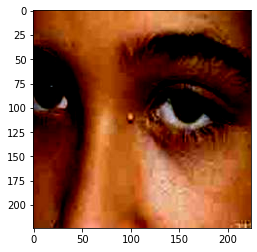

In [10]:
# imshow(tf.cast(images_train[6], tf.float32))

In [1]:
model = tf.keras.applications.ResNet152(weights=None)
epochs = 25
learning_rate = 0.01
decay_rate = learning_rate / epochs
# opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, decay=decay_rate)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate, decay=decay_rate)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(train_dataset)
# model.summary()
# lr_finder = LRFinder(model)
# lr_finder.find(x, y, start_lr=0.006, end_lr=1, batch_size=28, epochs=25)
history = model.fit(train_dataset, epochs=epochs, 
                    validation_data=(val_x, val_y))

NameError: name 'tf' is not defined

In [ ]:
# lr_finder.plot_loss()